# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Nurul Anzila Wahyana
- **Email:** anzilawhynn@gmail.com
- **ID Dicoding:** anzilawhyn

## Menentukan Pertanyaan Bisnis
- Apakah ada hubungan antara price dan delivery time dengan review score?
- Bagaimana total transaksi yang terjadi dalam beberapa bulan pada tahun 2018?
- Apa saja 10 kategori produk yang paling banyak diminati?

## Import Library

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. Load data orders

In [159]:
orders_df = pd.read_csv("../E-Commerce/dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


2. Load data products

In [160]:
products_df = pd.read_csv("../E-Commerce/dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


3. Load data order items

In [161]:
order_items_df = pd.read_csv("../E-Commerce/dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


4. Load data order reviews

In [162]:
order_reviews_df = pd.read_csv("../E-Commerce/dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


5. Load data product category

In [163]:
product_category_df = pd.read_csv("../E-Commerce/dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Tabel Orders

Melihat info data orders secara keseluruhan dan melihat data yang missing values

In [164]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Melihat jumlah data duplikasi dan deskripsi data orders

In [165]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Tabel Products

Melihat info data product secara keseluruhan dan melihat data yang missing values

In [166]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Melihat data duplikasi dan deskripsi pada data products

In [167]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Tabel Order Items

Melihat info data order items secara keseluruhan dan melihat data yang missing values

In [168]:
order_items_df.info()
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Melihat data duplikasi dan deskripsi pada data order items

In [169]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Tabel Order Reviews

Melihat info data order reviews secara keseluruhan dan melihat data yang missing values

In [170]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Melihat data duplikasi dan deskripsi pada data order reviews

In [171]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Tabel Product Category

Melihat info data product category secara keseluruhan dan melihat data yang missing values

In [172]:
product_category_df.info()
product_category_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

Melihat data duplikasi dan deskripsi pada data product category

In [173]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

#### Tabel Orders

Mengganti setiap tipe data pada kolom yang dipilih menjadi tipe data datetime

In [174]:
timestamp_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in timestamp_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

Melihat missing value pada kolom order_approved_at 

In [175]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Menghapus missing value yang terdapat pada kolom order_status kemudian memilih status delivered saja untuk diproses

In [176]:
orders_df = orders_df.dropna(subset=['order_status'])
orders_df = orders_df[orders_df['order_status'] == 'delivered']

Mengecek apakah ada nilai pada data selain data yang memiliki status delivered

In [177]:
orders_df[(orders_df.order_status != 'delivered') & orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


Menghapus data yang masih missing value

In [178]:
orders_df.dropna(axis=0, inplace=True)

In [179]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Tabel Product

In [180]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Menghapus data missing value pada kolom product_category_name

In [181]:
products_df.dropna(subset=['product_category_name'], inplace=True)

In [182]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [183]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


Melihat seluruh data dari nama kategori produk bebes

In [184]:
products_df[(products_df.product_category_name == 'bebes')]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
11,03b63c5fc16691530586ae020c345514,bebes,49.0,728.0,4.0,7150.0,50.0,19.0,45.0
23,8b41fbc2b984a12030090112324d1bc4,bebes,55.0,1627.0,1.0,500.0,20.0,13.0,13.0
35,5370b82a213393979691c98074265584,bebes,52.0,708.0,9.0,7950.0,33.0,30.0,44.0
43,b864b103180d5a6a3f830e67f93e8735,bebes,47.0,980.0,4.0,600.0,70.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...
32823,cba32576375902a87170bedaed045b71,bebes,58.0,1882.0,4.0,11467.0,35.0,57.0,52.0
32851,026311ea0b72ef8c80ebf91efd36b499,bebes,52.0,708.0,1.0,300.0,18.0,8.0,24.0
32853,34c84b2e246f5904a5b3597b00240ea2,bebes,55.0,1636.0,1.0,600.0,20.0,13.0,13.0
32935,d4484cc239fbd0ac671ab04d931edc66,bebes,42.0,414.0,2.0,150.0,23.0,15.0,15.0


Melakukan interpolasi berat, panjang, tinggi, dan lebar produk bebes dengan melakukan interpolasi sesuai produknya

In [185]:
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_weight_g'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_weight_g'].interpolate(method='linear', limit_direction='forward')

In [186]:
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_length_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_length_cm'].interpolate(method='linear', limit_direction='forward')

In [187]:
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_height_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_height_cm'].interpolate(method='linear', limit_direction='forward')

In [188]:
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_width_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_width_cm'].interpolate(method='linear', limit_direction='forward')

In [189]:
products_df[(products_df.product_category_name == 'bebes') & (products_df.product_weight_g == 18900.0)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8549,70b8127a4ee86d4b37b3eaf5e337e91b,bebes,55.0,963.0,4.0,18900.0,84.0,23.0,50.0
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,18900.0,73.0,29.0,51.0
8606,612be997cd3154e32e1e585d478571b1,bebes,51.0,513.0,1.0,18900.0,62.0,35.0,52.0


In [190]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Tabel Order Items

Mengubah tipe data shipping_limit_date menjadi datetime

In [191]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

## Exploratory Data Analysis (EDA)

### Explore Orders

In [192]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
28487,64e24ddb88fc682e81c8c49c6d6600d8,458d0b9b95ef994e7ed484ca51906ffc,delivered,2018-04-30 09:25:50,2018-04-30 09:50:28,2018-04-30 14:27:00,2018-05-14 21:08:26,2018-05-17
69251,d5e9e8db560b61662ece609c63b8257d,55d6ff673e6f752350de2e8779f8a021,delivered,2017-12-06 19:48:32,2017-12-06 19:56:20,2017-12-20 20:44:39,2017-12-27 20:23:33,2017-12-29
42090,cad5d7a0969b060d6df0afe1c761cb69,cd2149be09a8d515d7b129d8dbac2fc2,delivered,2017-08-02 10:41:43,2017-08-02 10:55:12,2017-08-04 10:26:34,2017-08-09 16:58:29,2017-08-22
31976,31f1be86be8795e41ef55b592873ae37,c3189548cd373b2d1f4d190e5008fe7b,delivered,2018-07-23 20:51:50,2018-07-24 10:31:38,2018-07-24 15:30:00,2018-07-30 20:16:20,2018-08-14
23989,e0fe96cb5635977938491ccfe7cd60f0,d81f3fa255fdfa20d57eaf95528b9533,delivered,2017-12-04 21:26:41,2017-12-05 10:30:44,2017-12-09 17:54:26,2017-12-14 15:13:59,2017-12-27


Menentukan waktu pengiriman berdasarkan saat customer melakukan pembayaran hingga sampai kepada customer dalam satuan hari

In [193]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [194]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
46192,7097cd0492a280b3e24b36fd672f5a59,0bdc7d7710cc0598046e4134d8a6af75,delivered,2018-03-27 00:14:42,2018-03-27 00:30:16,2018-03-27 23:34:46,2018-04-02 17:41:19,2018-04-10,7.0
85338,869a11332dfbdd33131c16f1ef2d75bf,45239e2efb1a649a70e3a709cab96bc3,delivered,2018-06-18 21:47:32,2018-06-18 21:58:18,2018-06-19 11:47:00,2018-06-20 18:12:26,2018-06-28,2.0
58568,dfd3adb2216c0276e57ee1560ac58210,874bde568cafaf8bab032b2c4ec6df66,delivered,2018-01-29 14:10:27,2018-01-30 04:31:13,2018-01-31 23:16:43,2018-02-19 15:18:05,2018-03-05,21.0
37639,999634d5935f33d0547e877223e04a63,76f19d6a7d77ce535fa4160a0a94358d,delivered,2018-08-16 12:49:01,2018-08-16 13:05:22,2018-08-17 10:05:00,2018-08-27 18:19:09,2018-08-30,11.0
80606,0a558295652f98bafe12e259c4d3fa26,4748b3055f838bb2685924aae49b1aac,delivered,2018-03-06 16:06:20,2018-03-07 16:10:52,2018-03-09 12:18:25,2018-03-20 21:26:59,2018-03-22,14.0


In [195]:
orders_df.sort_values(by='delivery_time', ascending=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
36189,aadf5fc042b64c57d336c1ad8a28a455,d7f4c9c4b263f6f0d8cd144f3f4533ab,delivered,2018-05-28 10:44:56,2018-05-28 10:55:24,2018-05-28 15:26:00,2018-05-29 17:06:56,2018-06-28,1.0
62151,9b87b416a8eafa9023a1ade52ae320a2,c024c53872188852f6eaa202a045bada,delivered,2018-08-01 06:30:41,2018-08-01 06:45:08,2018-08-01 14:33:00,2018-08-02 15:42:36,2018-08-07,1.0
11603,8073689e990d7df74e9c53a005260b54,f2a8619b531ec9f3c3d56b86190aea94,delivered,2018-04-25 08:16:25,2018-04-25 08:31:20,2018-04-25 14:54:00,2018-04-26 18:28:35,2018-05-14,1.0
21176,2b10f34d131e31564821104736086e82,ec41bcdb282e1a816ce6014f45a61b0c,delivered,2018-06-18 11:40:59,2018-06-18 12:37:18,2018-06-18 18:15:00,2018-06-19 13:12:20,2018-06-29,1.0
51547,f51e24deeba8f9a5f94706e82a2f8ea1,ee0cf28d0c8ce7f88fdc1ebf52fabfab,delivered,2017-08-21 11:29:55,2017-08-21 11:47:13,2017-08-21 20:27:55,2017-08-22 19:23:04,2017-09-01,1.0
...,...,...,...,...,...,...,...,...,...
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,195.0
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,195.0
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,196.0
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0


In [196]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96455,96455,96455,96455,96455,96455,96455,96455,96455.000000
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 00:26:23.673806336,2018-01-02 10:43:03.401710592,2018-01-05 05:53:41.200134656,2018-01-14 13:49:28.328526336,2018-01-25 18:04:03.421284864,12.516510
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:39:02.500000,2017-09-14 14:42:23,2017-09-18 17:06:18.500000,2017-09-25 22:56:47,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 20:00:12,2018-01-22 13:49:24,2018-01-24 16:28:58,2018-02-02 19:52:30,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:53:33,2018-05-06 10:52:57.500000,2018-05-08 14:34:30,2018-05-15 23:09:15.500000,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


### Order Items dan Products

Menggabungkan tabel order items dengan tabel products

In [197]:
items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


Menjumlahkan price dan freight value untuk mencari total price

In [198]:
items_products_df["total_price"] = items_products_df["price"] + items_products_df["freight_value"]

In [199]:
items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,72.19


Menampilkan dan mengurutkan total harga tiap bulannya

In [200]:
items_products_df['year_month'] = items_products_df['shipping_limit_date'].dt.to_period('M')

In [201]:
monthly_revenue = items_products_df.groupby('year_month').agg({'total_price': 'sum'})

In [202]:
monthly_revenue.sort_values(by='year_month', ascending=False)

,total_price
year_month,
2020-04,322.86
2020-02,175.34
2018-09,16026.36
2018-08,1259175.95
2018-07,964848.75
2018-06,1021381.12
2018-05,1252698.09
2018-04,1116664.98
2018-03,1209226.26


In [203]:
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_revenue_2018 = monthly_revenue[monthly_revenue.index.str.startswith('2018')]
monthly_revenue_2018.sort_values(by='year_month', ascending=True)

,total_price
year_month,
2018-01,987044.01
2018-02,958197.45
2018-03,1209226.26
2018-04,1116664.98
2018-05,1252698.09
2018-06,1021381.12
2018-07,964848.75
2018-08,1259175.95
2018-09,16026.36


In [204]:
monthly_total_sales = items_products_df.groupby(['product_category_name'])['total_price'].sum()
monthly_total_sales_sorted = monthly_total_sales.sort_values(ascending=False)
print(monthly_total_sales_sorted)

product_category_name
beleza_saude                     1441248.07
relogios_presentes               1305541.61
cama_mesa_banho                  1241681.72
esporte_lazer                    1156656.48
informatica_acessorios           1059272.40
                                    ...    
flores                              1598.91
casa_conforto_2                     1170.58
cds_dvds_musicais                    954.99
fashion_roupa_infanto_juvenil        665.36
seguros_e_servicos                   324.51
Name: total_price, Length: 73, dtype: float64


### Orders, Order Items, dan Order Reviews

In [205]:
items_reviews_df = pd.merge(
    left=order_items_df,
    right=order_reviews_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
items_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [206]:
correlation = items_reviews_df['price'].corr(items_reviews_df['review_score'])
print("Korelasi antara harga produk dan review score:", correlation)

Korelasi antara harga produk dan review score: -0.0039408700702119655


In [207]:
orders_items_reviews_df = pd.merge(
    left=orders_df,
    right=items_reviews_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
orders_items_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [208]:
correlation_price = orders_items_reviews_df[['price', 'review_score']].corr().iloc[0,1]
correlation_delivery = orders_items_reviews_df[['delivery_time', 'review_score']].corr().iloc[0,1]
print("Korelasi Harga:", correlation_price)
print("Korelasi Waktu Pengiriman:", correlation_delivery)

Korelasi Harga: -0.003940870070211812
Korelasi Waktu Pengiriman: -0.30381363257034655


### Merge semua data

In [209]:
data1_df = pd.merge(
    left=items_products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

all_df = pd.merge(
    left=data1_df,
    right=orders_items_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()
     

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,product_category_name,product_name_lenght,product_description_lenght,...,seller_id_y,shipping_limit_date_y,price_y,freight_value_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,b11cba360bbe71410c291b764753d37f,5.0,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,af01c4017c5ab46df6cc810e069e654a,4.0,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,426f43a82185969503fb3c86241a9535,5.0,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18


In [210]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158306 entries, 0 to 158305
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       158306 non-null  object        
 1   order_item_id_x                158306 non-null  int64         
 2   product_id_x                   158306 non-null  object        
 3   seller_id_x                    158306 non-null  object        
 4   shipping_limit_date_x          158306 non-null  datetime64[ns]
 5   price_x                        158306 non-null  float64       
 6   freight_value_x                158306 non-null  float64       
 7   product_category_name          156133 non-null  object        
 8   product_name_lenght            156133 non-null  float64       
 9   product_description_lenght     156133 non-null  float64       
 10  product_photos_qty             156133 non-null  float64       
 11  

In [211]:
all_df.to_csv("all_data.csv", index=False)

## Visualization dan Explanatory Analysis

### Apakah ada hubungan antara price dan delivery time dengan review score?

In [212]:
all_df.sample(5)

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,product_category_name,product_name_lenght,product_description_lenght,...,seller_id_y,shipping_limit_date_y,price_y,freight_value_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
92668,247d40d57494c99a2d2112878041d45e,1,57f2de7e1c6028c7d38a50cff155c794,9616352088dcf83a7c06637f4ebf1c80,2017-11-27 04:10:29,39.00,13.37,esporte_lazer,44.0,221.0,...,9616352088dcf83a7c06637f4ebf1c80,2017-11-27 04:10:29,39.00,13.37,c5ed131f111e20ed8aa742d077573655,5.0,NaN,NaN,2017-11-26 00:00:00,2017-11-26 18:06:15
50241,867b142c274783a46707af07874ac568,1,bf128711128b70eaa9e07df69e9a75e2,75d34ebb1bd0bd7dde40dd507b8169c3,2017-04-07 03:43:51,119.99,18.27,telefonia,61.0,992.0,...,75d34ebb1bd0bd7dde40dd507b8169c3,2017-04-07 03:43:51,119.99,18.27,9a686042d934f1cc395f79c0aec52e8f,5.0,NaN,Excelente loja.\r\n,2017-04-07 00:00:00,2017-04-07 23:46:43
8558,428864d148621bd89ac5ca142b0e15af,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-11-20 19:35:26,75.00,13.08,moveis_decoracao,44.0,903.0,...,955fee9216a65b617aa5c0531780ce60,2017-11-20 19:35:26,75.00,13.08,bc12fb897e806b095f13ca8119f68115,1.0,NaN,Meu produto veio faltando peça o que o impossi...,2017-11-18 00:00:00,2017-11-20 01:02:54
41762,80c2d7b033497bf5aea90a2eb4b0966c,1,dc0fe1906bacc99199eb46fce442e1de,b1ac6ea7895bc3dd6f0f6f4abbdd2821,2017-09-19 16:04:59,59.00,24.96,esporte_lazer,16.0,347.0,...,b1ac6ea7895bc3dd6f0f6f4abbdd2821,2017-09-19 16:04:59,59.00,24.96,f2910dac33f974915b5183c39ea156d2,5.0,NaN,NaN,2017-09-23 00:00:00,2017-10-02 18:01:02
53298,d22278809a8d70fd68df910e0396c39e,1,9a7c0784b8058269d176b3089c946ed0,1900267e848ceeba8fa32d80c1a5f5a8,2018-06-14 19:12:17,54.99,13.74,cama_mesa_banho,54.0,629.0,...,1900267e848ceeba8fa32d80c1a5f5a8,2018-06-14 19:12:17,54.99,13.74,4acb4e898098fd614a93c9ebe6986ecc,5.0,NaN,NaN,2018-06-16 00:00:00,2018-06-18 00:04:43


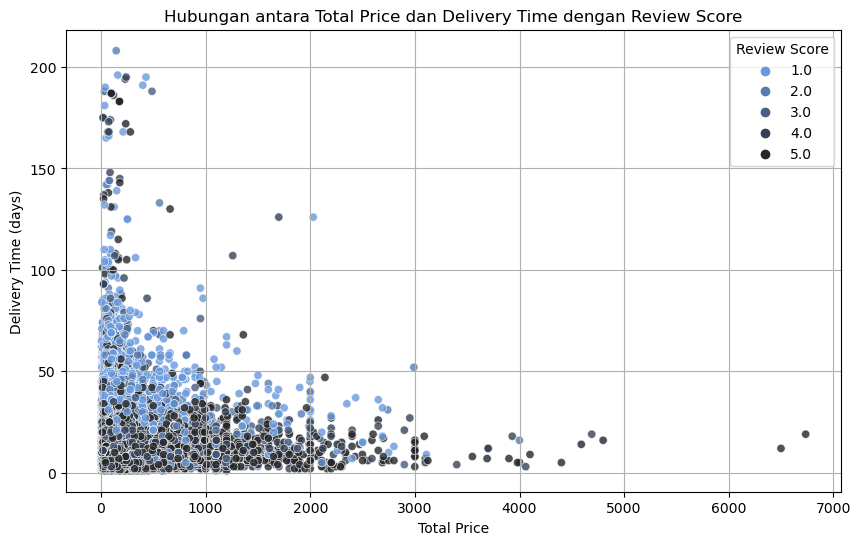

In [213]:
rgb_color = (105/255, 153/255, 221/255) 
custom_palette = sns.dark_palette(rgb_color, reverse=True, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=all_df, x='price_x', y='delivery_time', hue='review_score', palette=custom_palette, alpha=0.8, ax=ax)
plt.title('Hubungan antara Total Price dan Delivery Time dengan Review Score')
plt.xlabel('Total Price')
plt.ylabel('Delivery Time (days)')
plt.legend(title='Review Score')
plt.grid(True)
plt.show()

### Bagaimana total transaksi yang terjadi dalam beberapa bulan pada tahun 2018?

In [214]:
all_df['year_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
transaction_total = all_df.groupby('year_month').agg({'total_price': 'sum'})

In [215]:
transaction_total.index = transaction_total.index.astype(str)
transaction_total_2018 = transaction_total[transaction_total.index.str.startswith('2018')]
transaction_total_2018.sort_values(by='year_month', ascending=True)

,total_price
year_month,
2018-01,1382832.81
2018-02,1295337.02
2018-03,1441852.38
2018-04,1469081.19
2018-05,1481468.08
2018-06,1286281.79
2018-07,1309334.27
2018-08,1211438.17


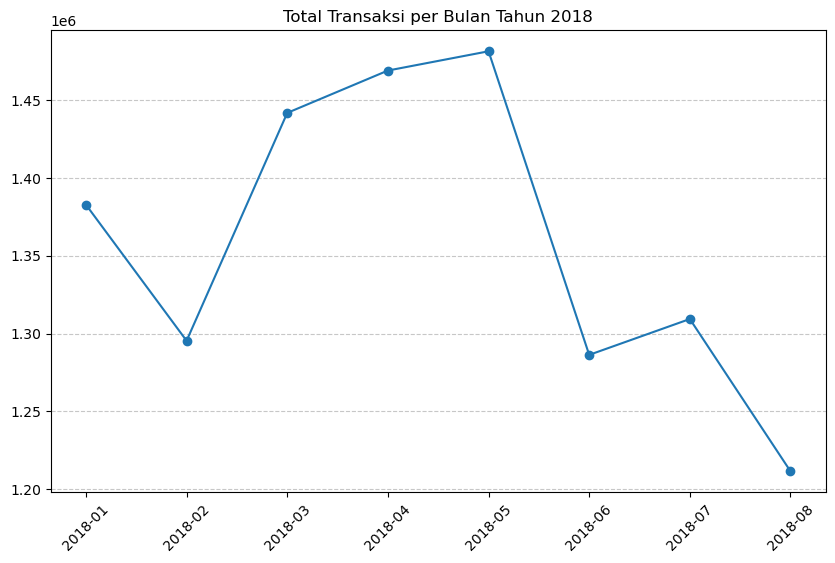

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(transaction_total_2018.index, transaction_total_2018.values, marker='o', linestyle='-')
plt.title('Total Transaksi per Bulan Tahun 2018')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Apa saja 10 kategori produk yang paling banyak diminati?

In [217]:
monthly_total_sales = all_df.groupby(['product_category_name_english'])['total_price'].sum()
monthly_total_sales_sorted = monthly_total_sales.sort_values(ascending=True)
top_10_categories = monthly_total_sales_sorted.head(10)

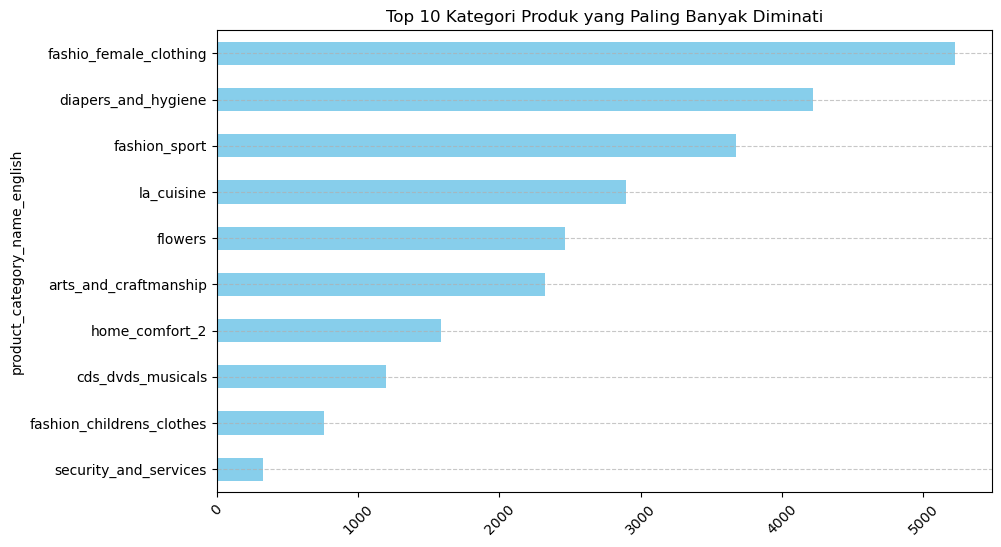

In [218]:
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='barh', color='skyblue')
plt.title('Top 10 Kategori Produk yang Paling Banyak Diminati')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Dari visualisasi 'Hubungan antara Total Price dan Delivery Time dengan Review Score' dapat ditarik kesimpulan bahwa waktu pengiriman sangat berpengaruh dimana waktu pengiriman singkat cenderung mendapatkan penilaian 5 bintang. Sedangkan hubungan antara penilaian dengan harga barang tidak terlalu berpengaruh karena jika dilihat pada grafik di atas bahwa semakin ke kanan penilaian buruk tidak terlalu nampak seperti hubungan antara waktu pengiriman dengan penilaian.

- Dari data yang sudah diolah, nampak bahwa total transaksi mengalami kenaikan dan penurunan tiap bulannya. Namun, pada bulan Juni transaksi yang terjadi mengalami penurunan yang sangat signifikan. Penurunan ini bisa terjadi karena beberapa faktor. Kemudian pad abulan Juli ada peningkatan dan selanjutnya ada penurunan pada bulan agustus. Penurunan pada bulan agustus ada kemungkinan terjadi karena data yang tidak lengkap sehingga data tahun 2018 berhenti di bulan agustus dengan nilai paling rendah di antara bulan lainnya.

- Grafik Top 10 Kategori Produk yang Paling Banyak Diminati menunjukkan bahwa kategori produk yang paling banyak diminati customer dalam platform adalah pakaian perempuan atau fashion female clothing yang menunjukkan kemungkinan terbesar customer berada dalam kalangan perempuan.